In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\results.csv")

In [4]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
binwidth = (df.home_score.max() - df.home_score.min()) /25

(array([2.2599e+04, 9.2630e+03, 4.9410e+03, 2.5440e+03, 1.8850e+03,
        3.5900e+02, 1.9600e+02, 1.1900e+02, 9.6000e+01, 2.7000e+01,
        1.4000e+01, 1.2000e+01, 1.4000e+01, 3.0000e+00, 1.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00]),
 array([ 0.  ,  1.24,  2.48,  3.72,  4.96,  6.2 ,  7.44,  8.68,  9.92,
        11.16, 12.4 , 13.64, 14.88, 16.12, 17.36, 18.6 , 19.84, 21.08,
        22.32, 23.56, 24.8 , 26.04, 27.28, 28.52, 29.76, 31.  , 32.24]),
 <a list of 26 Patch objects>)

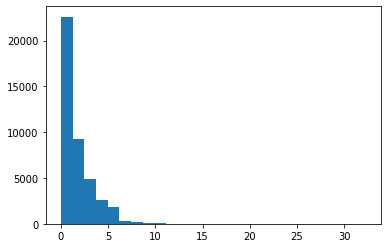

In [6]:
plt.hist(df.home_score, bins = np.arange(min(df.home_score), max(df.home_score)+ binwidth, binwidth))

(array([1.5636e+04, 1.3567e+04, 7.3050e+03, 3.1370e+03, 1.3020e+03,
        5.4600e+02, 0.0000e+00, 2.8100e+02, 1.3600e+02, 6.8000e+01,
        3.6000e+01, 2.1000e+01, 0.0000e+00, 7.0000e+00, 8.0000e+00,
        7.0000e+00, 2.0000e+00, 6.0000e+00, 0.0000e+00, 3.0000e+00,
        3.0000e+00, 5.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([ 0.  ,  0.84,  1.68,  2.52,  3.36,  4.2 ,  5.04,  5.88,  6.72,
         7.56,  8.4 ,  9.24, 10.08, 10.92, 11.76, 12.6 , 13.44, 14.28,
        15.12, 15.96, 16.8 , 17.64, 18.48, 19.32, 20.16, 21.  ]),
 <a list of 25 Patch objects>)

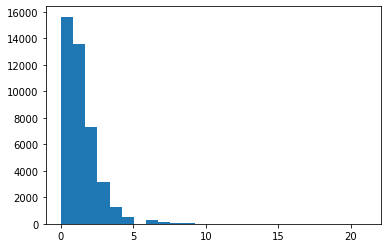

In [7]:
binwidth = (df.away_score.max() - df.away_score.min()) /25
plt.hist(df.away_score, bins = np.arange(min(df.away_score), max(df.away_score)+ binwidth, binwidth))

In [8]:
awaymean = df.away_score.mean()
homemean = df.home_score.mean()
print("The away score mean is {} and the home mean score is {}".format(awaymean,homemean))

The away score mean is 1.186540563661423 and the home mean score is 1.743690889216292


As seen from above the home mean score is much more higher than the mean score of away team mean score. This indicates that there is some advantage of being the home team rather than being the away team.

In [9]:
dfhome = df.groupby(['tournament'])['home_score'].mean().to_frame().reset_index()
dfaway = df.groupby(['tournament'])['away_score'].mean().to_frame().reset_index()
dfscoreaverage = dfhome.merge(dfaway,how = 'inner', on = 'tournament', )

In [10]:
dfscoreaverage.head()

,tournament,home_score,away_score
0,ABCS Tournament,2.150000,1.550000
1,AFC Asian Cup,1.508108,1.159459
2,AFC Asian Cup qualification,2.272099,1.069061
3,AFC Challenge Cup,1.420000,1.240000
4,AFC Challenge Cup qualification,1.902174,1.141304


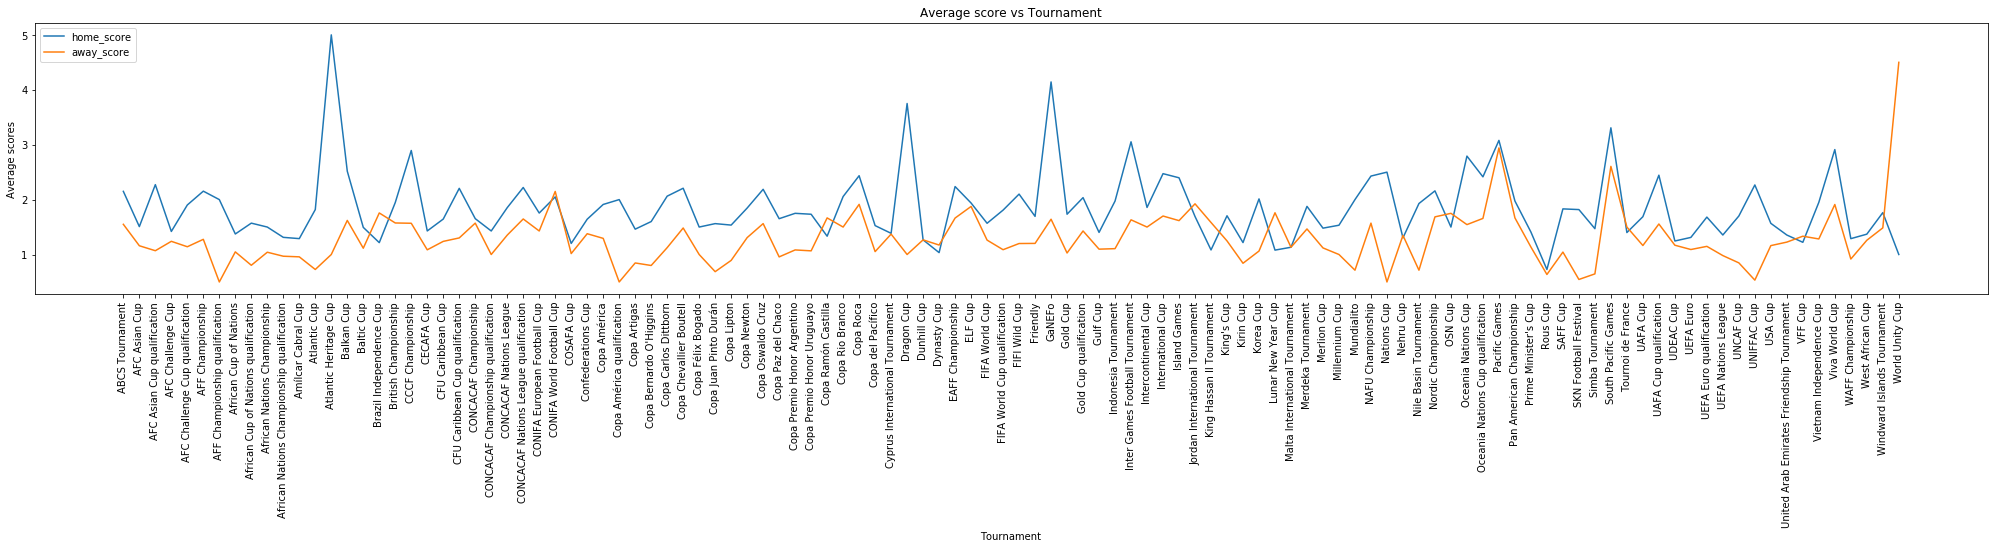

In [11]:
plt.figure(figsize = (35,5))
plt.plot(dfscoreaverage.tournament,dfscoreaverage.home_score, label = "home_score" )
plt.plot(dfscoreaverage.tournament,dfscoreaverage.away_score, label = "away_score")

plt.title("Average score vs Tournament")
plt.xlabel("Tournament")
plt.xticks(rotation = 90)
plt.ylabel("Average scores")
plt.legend()

plt.show()

The blue line shows the mean score of home team while the orange line shows the mean score of the away team. The blue line is almost always above the orange line. This means that the home team score better than the away team.

In [16]:
dfcountry = df.groupby(['country']).mean().reset_index()
dfcountry.head()

,country,home_score,away_score,neutral
0,Afghanistan,0.875000,1.375000,0.250000
1,Albania,1.107143,1.202381,0.047619
2,Algeria,1.882353,0.774510,0.073529
3,Andorra,0.357143,2.228571,0.000000
4,Angola,1.535032,0.783439,0.210191


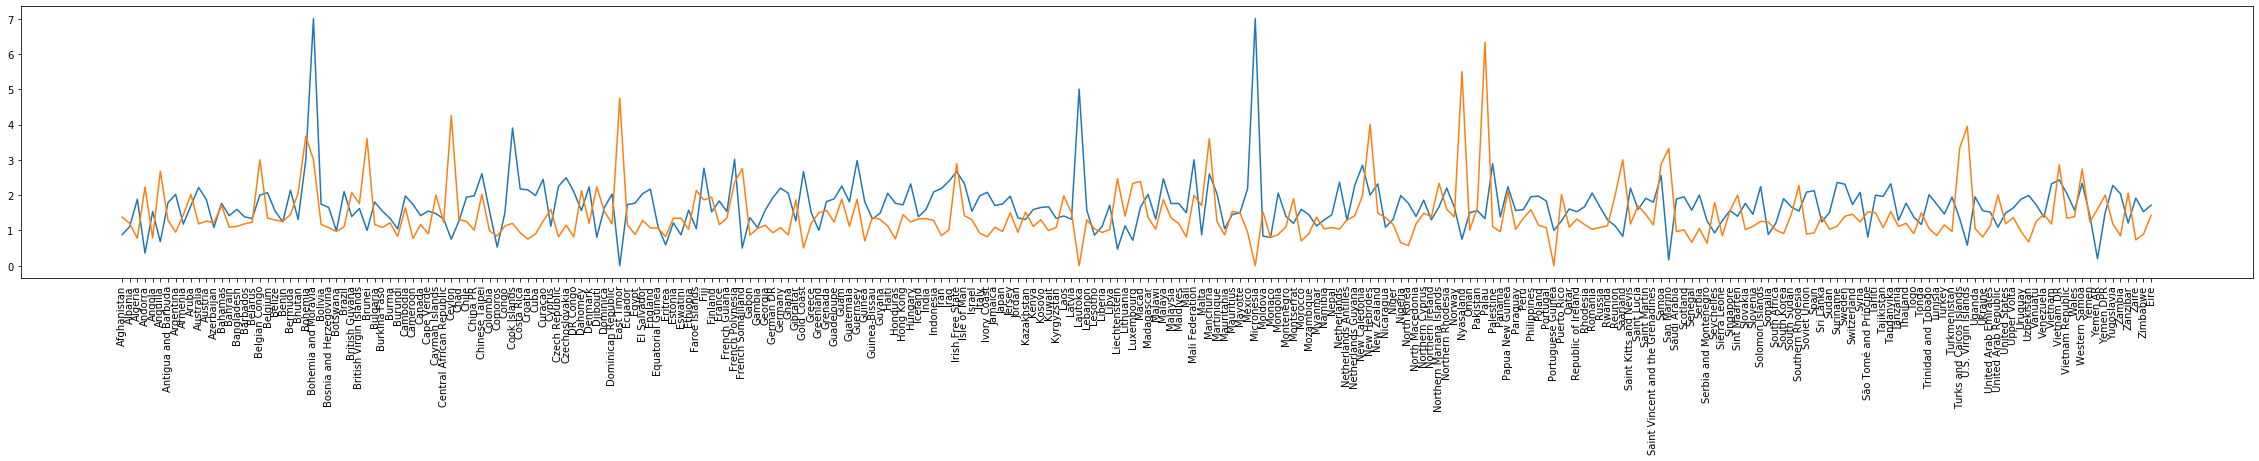

In [20]:
plt.figure(figsize = (40,5))
plt.plot(dfcountry.country,dfcountry.home_score,label = 'home score mean')
plt.plot(dfcountry.country,dfcountry.away_score,label = 'away score mean')
plt.xticks(rotation = 90)

plt.show()

In [5]:
df['HomeTeamWon'] = np.where(df['home_score']> df["away_score"], 1,0)

In [8]:
df.tournament.unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio